In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

**Due to internal code design, single ODE should also be written in a ODE system form.**

In [2]:
def f(t, y):
    '''
        dy/dt = f(t, y)
        This is f() function on the right
    '''    
    return [-y[0] + np.sin(t)] # should be a list

t = np.linspace(0, 6, 20).reshape(-1,1)
y0_list = [1] # should be a list

In [3]:
sol = solve_ivp(f, [t.min(), t.max()], y0_list, method='Radau', rtol=1e-5)

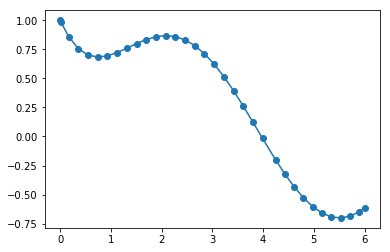

In [4]:
plt.plot(sol.t, sol.y[0], marker='o')

In [5]:
nn = NNSolver(f, t, y0_list)
nn

Neural ODE Solver 
Number of equations:       1 
Initial condition y0:      [1] 
Numnber of hidden units:   10 
Number of training points: 20 

In [6]:
nn.reset_weights()
%time nn.train()

iteration: 0 loss:  6.07954803109
iteration: 200 loss:  3.41996807636e-06
iteration: 400 loss:  3.37595806272e-07
iteration: 600 loss:  2.19611746943e-07
iteration: 800 loss:  8.25420983712e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 898
         Function evaluations: 1040
         Gradient evaluations: 1040
CPU times: user 3.26 s, sys: 40.5 ms, total: 3.3 s
Wall time: 3.41 s


In [7]:
nn.loss_func(nn.params_list)

3.8192507085553512e-08

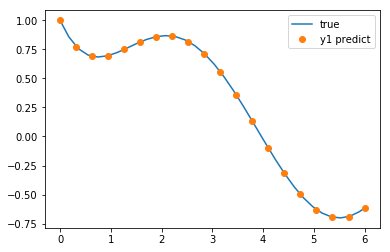

In [8]:
y_pred_list, _ = nn.predict()
plt.plot(sol.t, sol.y[0], label='true')
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')
plt.legend()